# Легенда
Имеются данные по мобильной игре Quiz Freeze, в которой пользователи отвечают на различные вопросы.  
Пользовать может отвечать на бесплатные вопросы, а так же купить пакет платных вопросов.  
Необходимо проверить некоторые гипотезы.


## Гипотезы:
1. По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?  
2. Влияет ли неоднократное прохождение обучения на оплату?
3. Если пользователь сначала выбирает сложность заданий, будет ли он потом проходить обучение?  
4. По идеи, пользователи, которые выбирают разный уровень сложности, по разному относятся к покупке платных вопросов.

## Этапы игры
Пользователь за время нахождения в приложении проходит определённые ключевые этапы:  
1. Регистрация (registration) — это обязательный этап. Без регистрации пользователь не может пройти на следующие этапы работы с приложением.

2. Старт обучения (tutorial start) — опциональный этап. Пользователь после регистрации может перейти к обучению работе с приложением, а может и не перейти. При этом вернуться к обучению можно в любой момент. А ещё можно пройти обучение несколько раз.  

3. Завершение обучения (tutorial finish) может произойти только в случае, если ранее произошло событие «Старт обучения», но при этом пользователь может не завершить обучение. 

4. Выбор уровня сложности вопросов (level choice) — это обязательное событие, которое нужно для того, чтобы перейти к выбору пакетов вопросов. Таким образом, пользователь может не пройти обучение или даже не начинать его, но прежде чем начать отвечать, он обязан выбрать уровень сложности(существует 3 разных уровня сложности).  

5. Выбор пакетов вопросов (pack choice, другое название training choice) — это этап, на котором пользователь выбирает себе бесплатный набор пакетов вопросов, на которые он будет отвечать.

6. Покупка платных пакетов вопросов (purchase) — это факт совершения оплаты за вопросы, которые не доступны в списке бесплатных вопросов.

## Конкретные задачи:
1. Сравнить время прохождения этапов игры для пользователей, которые начали, закончили или не начинали обучение (сформировать группы), а так же, сколько пользователей из этих групп доходят до этапа покупки платных вопросов.  

2. Проверить, существует ли зависимость с количеством пройденных обучений пользователем и оплатой.  

3. Проверить, как часто пользователи проходят обучение, после выбора сложности. Это позволит оценить прозрачность и простоту работы с приложением.

4. Проверить, если разница между выбранным уровнем сложности и шансом покупки.


## Данные:

Доступны две таблицы:

1. Events. Хранит данные о событиях, которые совершают пользователи. По сути, каждое событие — это факт прохождения пользователем какого-либо этапа игры.  
id - идентификатор события;  
user_id - уникальный идентификатор пользователя, совершившего событие в приложении;  
start_time - дата и время события;  
event_type - тип события (значения: registration — регистрация; tutorial_start — начало обучения; tutorial_finish — завершение обучения; level_choice — выбор уровня сложности; pack_choice — выбор пакетов вопросов);  
tutorial_id - идентификатор обучения (этот идентификатор есть только у событий обучения);  
selected_level - выбранный уровень сложности обучения.  

2. Purchase. Хранит данные об оплатах, которые совершают пользователи.  
id - идентификатор события;  
user_id - уникальный идентификатор пользователя, совершившего событие в приложении;  
event_datetime - дата и время события/покупки;  
amount - сумма оплаты.  

In [20]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Загрузим данные
events = pd.read_csv('Events.csv')
display(events.head())
display(events.info())

purchase = pd.read_csv('purchase.csv')
display(purchase.head())
display(purchase.info())

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB


None

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


None

In [21]:
#В первую очередь, выберем данные только в период с 1 января по 31 декабря 2018 года включительно
#Так как за остальной период, данные битые

events = events[(events['start_time'] >= '2018-01-01') & (events['start_time'] < '2019-01-01')]
events['start_time'] = pd.to_datetime(events['start_time'])
purchase = purchase[(purchase['event_datetime'] >= '2018-01-01') & (purchase['event_datetime'] < '2019-01-01')]
purchase['event_datetime'] = pd.to_datetime(purchase['event_datetime'])

#Проверим что всё в порядке
display(events['start_time'].min(), events['start_time'].max())

display(purchase['event_datetime'].min(), purchase['event_datetime'].max())

Timestamp('2018-01-01 03:48:40')

Timestamp('2018-12-31 23:18:06')

Timestamp('2018-01-01 12:37:02')

Timestamp('2018-12-31 17:13:54')

## Гипотеза 1

По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

In [22]:
#Необходимо разделить пользователей на три группы:
# Прошли обучение(хотя бы один раз)
# Начали, но не закончили обучение
# Не начинали обучение

#Создадим групповую таблицу
users_event_group = events.pivot_table(
    index='user_id',
    columns='event_type',
    values='start_time',
    aggfunc='min'
)
#Приведём столбцы в рабочий формат
users_event_group.columns = list(map(lambda x: x, users_event_group))
users_event_group = users_event_group.reset_index()

display(users_event_group)

,user_id,level_choice,pack_choice,registration,tutorial_finish,tutorial_start
0,27832,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
1,27833,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
...,...,...,...,...,...,...
19921,47753,2018-12-31 22:36:19,2018-12-31 22:38:05,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
19922,47754,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
19923,47755,NaT,NaT,2018-12-31 21:15:14,NaT,NaT
19924,47756,NaT,NaT,2018-12-31 23:17:30,NaT,NaT


In [23]:
#Создаём группы пользователей

#Прошедшие обучение(группа 1)
mask1 = users_event_group[users_event_group['tutorial_finish'].notnull()]
group1_list = mask1['user_id'].unique()

#Начали, но не закончили обучение(группа 2)
mask2 = users_event_group[(users_event_group['tutorial_finish'].isnull()) & (users_event_group['tutorial_start'].notnull())]
group2_list = mask2['user_id'].unique()

#Не начинали обучение(группа 3)
mask3 = users_event_group[users_event_group['tutorial_start'].isnull()]
group3_list = mask3['user_id'].unique()

display(mask1.head())
display(mask2.head())
display(mask3.head())


,user_id,level_choice,pack_choice,registration,tutorial_finish,tutorial_start
1,27833,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
7,27839,2018-01-01 22:37:50,2018-01-01 22:42:54,2018-01-01 18:24:01,2018-01-01 19:16:32,2018-01-01 19:11:36


,user_id,level_choice,pack_choice,registration,tutorial_finish,tutorial_start
8,27840,2018-01-02 05:18:42,NaT,2018-01-01 20:53:21,NaT,2018-01-02 02:07:07
24,27856,2018-01-03 08:31:35,2018-01-03 08:33:35,2018-01-02 21:18:21,NaT,2018-01-03 04:36:55
25,27857,NaT,NaT,2018-01-02 21:25:30,NaT,2018-01-03 07:18:57
27,27859,2018-01-03 01:11:45,NaT,2018-01-02 21:30:27,NaT,2018-01-02 21:37:44
33,27865,2018-01-04 05:56:32,2018-01-04 06:03:20,2018-01-03 11:14:57,NaT,2018-01-03 23:30:17


,user_id,level_choice,pack_choice,registration,tutorial_finish,tutorial_start
0,27832,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
5,27837,NaT,NaT,2018-01-01 14:08:40,NaT,NaT
6,27838,NaT,NaT,2018-01-01 14:42:58,NaT,NaT
12,27844,NaT,NaT,2018-01-02 00:13:22,NaT,NaT
16,27848,NaT,NaT,2018-01-02 06:05:02,NaT,NaT


### Считаем время прохождения этапов
Регистрация -> старт обучения(опционально) -> завершение обучения -> выбор уровня сложности -> выбор пакетов вопросов -> покупка платных вопросов.  

Т.к. не все группы начинали и заканчивали обучение, то будет считаться время прохождения между следующими этапами:  
1. Регистрация - выбор уровня сложности
2. Выбор уровня сложности - выбор пакетов вопросов
3. Выбор пакетов вопросов - покупка платных вопросов

In [24]:
#Считаем время прохождения этапов

#добавим в таблицу информацию о времени покупки платных вопросов
users_event_group = purchase[['user_id', 'event_datetime']].merge(
    users_event_group,
    on='user_id',
    how='right'
)
#переименуем стлобец
users_event_group = users_event_group.rename(columns={'event_datetime': 'purchase'})


#Этапы
users_event_group['reg-level'] = users_event_group['level_choice'] - users_event_group['registration']
users_event_group['level-pack'] = users_event_group['pack_choice'] - users_event_group['level_choice']
users_event_group['pack-purchase'] = users_event_group['purchase'] - users_event_group['pack_choice']

#Переводим получившиеся значения в часы
users_event_group.iloc[:, 7:] = round(users_event_group.iloc[:, 7:].astype('timedelta64[m]') / 60,2)

display(users_event_group)


,user_id,purchase,level_choice,pack_choice,registration,tutorial_finish,tutorial_start,reg-level,level-pack,pack-purchase
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,NaN,NaN,NaN
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,NaN,NaN,NaN
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,NaN,NaN,NaN
3,27835,NaT,2018-01-01 20:37:22,2018-01-01 20:38:43,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,8.70,0.02,NaN
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19921,47753,NaT,2018-12-31 22:36:19,2018-12-31 22:38:05,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56,3.62,0.02,NaN
19922,47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT,NaN,NaN,NaN
19923,47755,NaT,NaT,NaT,2018-12-31 21:15:14,NaT,NaT,NaN,NaN,NaN
19924,47756,NaT,NaT,NaT,2018-12-31 23:17:30,NaT,NaT,NaN,NaN,NaN


Далее применяются маски и считается среднее время прохождения каждого этапа  

Расчёты будут представленны в словарях, которые далее преобразуется в датафрейм.  

Расчитываться будет среднее и медианное время, в случае если медианное время будет сильно отличаться от среднего, это скажет о том, что в данных присутствуют выбросы. Их нужно будет убрать из выборки или просто использовать медианное время.  

In [25]:
#применяем маски и считаем среднее время прохождения каждого этапа
group1_df = users_event_group[users_event_group['user_id'].isin(group1_list)]
group2_df = users_event_group[users_event_group['user_id'].isin(group2_list)]
group3_df = users_event_group[users_event_group['user_id'].isin(group3_list)]

#Группа 1
group1_dict = {
    'reg-level': list([group1_df['reg-level'].mean(), group1_df['reg-level'].median(),\
        group1_df[group1_df['reg-level'].notnull()]['user_id'].nunique()]),
    
    'level-pack': list([group1_df['level-pack'].mean(), group1_df['level-pack'].median(),\
        group1_df[group1_df['level-pack'].notnull()]['user_id'].nunique()]),
    
    'pack-purchase': list([group1_df['pack-purchase'].mean(), group1_df['pack-purchase'].median(),\
        group1_df[group1_df['pack-purchase'].notnull()]['user_id'].nunique()])
}

#Группа 2
group2_dict = {
    'reg-level': [group2_df['reg-level'].mean(), group2_df['reg-level'].median(),\
        group2_df[group2_df['reg-level'].notnull()]['user_id'].nunique()],
    
    'level-pack': [group2_df['level-pack'].mean(), group2_df['level-pack'].median(),\
        group2_df[group2_df['level-pack'].notnull()]['user_id'].nunique()],
    
    'pack-purchase': [group2_df['pack-purchase'].mean(), group2_df['pack-purchase'].median(),\
        group2_df[group2_df['pack-purchase'].notnull()]['user_id'].nunique()]
}

#Группа 3
group3_dict = {
    'reg-level': [group3_df['reg-level'].mean(), group3_df['reg-level'].median(),\
        group3_df[group3_df['reg-level'].notnull()]['user_id'].nunique()],
    
    'level-pack': [group3_df['level-pack'].mean(), group3_df['level-pack'].median(),\
        group3_df[group3_df['level-pack'].notnull()]['user_id'].nunique()],
    
    'pack-purchase': [group3_df['pack-purchase'].mean(), group3_df['pack-purchase'].median(),\
        group3_df[group3_df['pack-purchase'].notnull()]['user_id'].nunique()]
}


display(group1_dict)
display(group2_dict)
display(group3_dict)

{'reg-level': [7.085312708361115, 6.0, 7499],
 'level-pack': [0.08009661835748792, 0.07, 5175],
 'pack-purchase': [89.11030534351144, 84.1, 1441]}

{'reg-level': [8.207967698519516, 7.28, 743],
 'level-pack': [0.07685831622176592, 0.07, 487],
 'pack-purchase': [93.23824427480916, 91.18, 131]}

{'reg-level': [5.2507142857142854, 4.925, 98],
 'level-pack': [0.08270270270270272, 0.07, 74],
 'pack-purchase': [100.81636363636363, 100.64, 22]}

In [26]:
#Далее сделаем из словерей единый датафрейм, которой можно будет визуализировать 
#И ответить на гипотезу

group1_dict = pd.DataFrame.from_dict(group1_dict, orient='index')
group1_dict = group1_dict.rename_axis('index').reset_index()
group1_dict = group1_dict.rename(columns={0: 'mean', 1: 'median', 2: 'users'})
group1_dict['group'] = 'group 1'
group1_dict['mean'] = group1_dict['mean'].apply(lambda x: round(x,2))

group2_dict = pd.DataFrame.from_dict(group2_dict, orient='index')
group2_dict = group2_dict.rename_axis('index').reset_index()
group2_dict = group2_dict.rename(columns={0: 'mean', 1: 'median', 2: 'users'})
group2_dict['group'] = 'group 2'

group3_dict = pd.DataFrame.from_dict(group3_dict, orient='index')
group3_dict = group3_dict.rename_axis('index').reset_index()
group3_dict = group3_dict.rename(columns={0: 'mean', 1: 'median', 2: 'users'})
group3_dict['group'] = 'group 3'


group_all = pd.concat([group1_dict, group2_dict, group3_dict])
group_all['mean'] = group_all['mean'].apply(lambda x: round(x,2))


display(group_all)

,index,mean,median,users,group
0,reg-level,7.09,6.000,7499,group 1
1,level-pack,0.08,0.070,5175,group 1
2,pack-purchase,89.11,84.100,1441,group 1
0,reg-level,8.21,7.280,743,group 2
1,level-pack,0.08,0.070,487,group 2
2,pack-purchase,93.24,91.180,131,group 2
0,reg-level,5.25,4.925,98,group 3
1,level-pack,0.08,0.070,74,group 3
2,pack-purchase,100.82,100.640,22,group 3


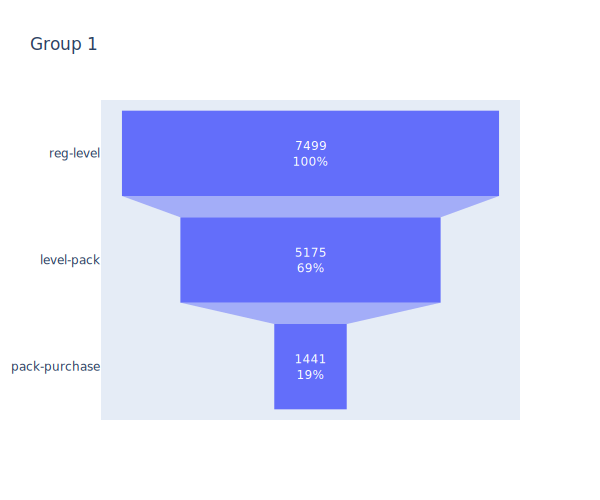

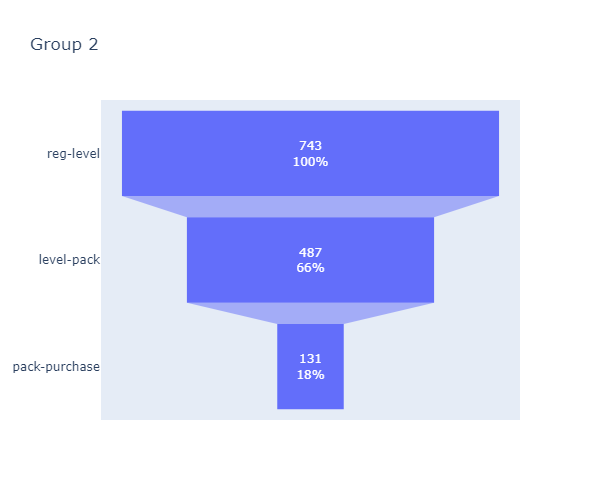

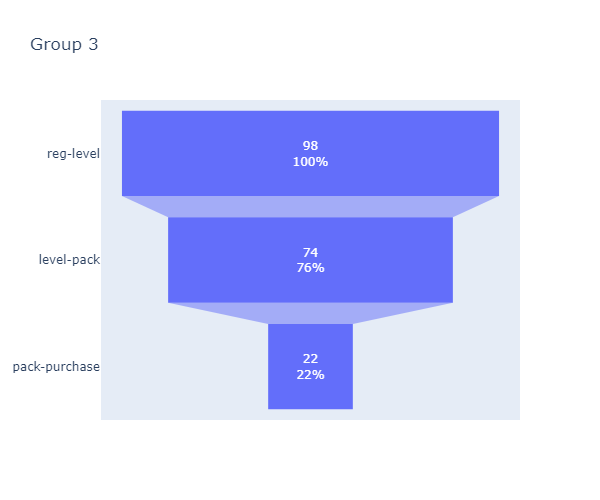

In [27]:
#визуализация гипотезы 1

#Распределение изначального количество пользователей по группам

fig_hip1_1 = px.pie(
    data_frame=group_all[group_all['index'] == 'reg-level'],
    names='group',
    values='users',
    height = 400,
    width = 400
)

fig_hip1_1.show('png')

#Медианное время, схоже со средним, поэтому будем использовать среднее время.

fig_hip1_2 = px.bar(
    data_frame=group_all,
    x='index',
    y='mean',
    facet_col='group',
    text='mean',
    title='Среднее время прохождения этапов в часах, для каждой группы'
)
fig_hip1_2.show('png')

#Создадим воронки для групп

fig_hip1_gr1 = go.Figure(go.Funnel(
    y=group_all[group_all['group'] == 'group 1']['index'],
    x=group_all[group_all['group'] == 'group 1']['users'],
    textinfo = "value+percent initial"
))
fig_hip1_gr1.update_layout(
    width=600,
    height=500,
    title='Group 1'
)



fig_hip1_gr2 = go.Figure(go.Funnel(
    y=group_all[group_all['group'] == 'group 2']['index'],
    x=group_all[group_all['group'] == 'group 2']['users'],
    textinfo = "value+percent initial"
))
fig_hip1_gr2.update_layout(
    width=600,
    height=500,
    title='Group 2'
)



fig_hip1_gr3 = go.Figure(go.Funnel(
    y=group_all[group_all['group'] == 'group 3']['index'],
    x=group_all[group_all['group'] == 'group 3']['users'],
    textinfo = "value+percent initial"
))
fig_hip1_gr3.update_layout(
    width=600,
    height=500,
    title='Group 3'
)



fig_hip1_gr1.show('svg')
fig_hip1_gr2.show('svg')
fig_hip1_gr3.show('svg')


### Выводы по гипотезе №1

Напоминание:  
Группа 1 - Пользователи прошедшие обучение;    
Группа 2 - Пользователи начавшие проходить обучение, но не закончившие его;  
Групаа 3 - Пользователи не начинавшие проходить обучение.  

#### Распределение пользвателей

Группа 1 является самой многочисленной, на неё приходится ~90% пользователей (7499 человек). Второй по численности является группа 2 - ~9% (743 человека). Самой малочисленной является группа 3, около 1% пользователей.  

#### Среднее время прохождения этапов  

Регистрация - выбор уровня сложности:  
Группа 1, прошедшая обучение, в среднем (7 часов), на 1 час быстрее доходит до этапа выбора уровня сложности, чем группа 2 (в среднем 8 часов), не закончившая обучение.  
Интересно то, что группа 3, которая не проходит обучение вовсе, доходит до этапа выбора уровня сложности, быстрее двух других групп (5 часов). Это можно объяснить тем, что группа не малочислена и вполне возможно, это пользователи, которые уже знакомы с приложением, но используют его с другого устройства или аккаунта.  

Выбор уровня сложности - выбор пакета вопросов:
Время прохождения этапа минимально (около 5 минут) для всех групп. Этап проходной и не сложный, ничего странного.  

Выбор пакета вопросов - покупка платных вопросов:  
Здесь прослеживается явная тенденция, если пользователи прошли обучение, то они быстрее доходят до этапа покупки платных вопросов.  
Группа 1 - 89 часов. Группа 2 - 93 часа. Группа 3 - 101 час. 
Прохождение обучения влияет на скорость прохождения этапов. Группа 1 быстрее доходит до этапа покупки вопросов.  
Но влияет ли это обучение на конверсию из обычного пользователя, в покупателя?  

#### Воронка превращения пользователя в покупателя  

Для всех трёх групп конверсия в покупателя очень близкая, 18-20%.  
В группе 3, чуть большее количество пользователей, доходит до этапа выбора бесплатных вопросов, это может так же служит сигналом о том, что это пользователи, которые уже имели дело с приложением.  

## Гипотеза 2

Влияет ли неоднократное прохождение обучения на оплату?

In [28]:
#Посчитаем количество пройденых обучений каждым пользователем
tutorial_count = events[events['event_type'] == 'tutorial_finish']
tutorial_count = tutorial_count.groupby('user_id', as_index=False)['start_time'].count()
#Создадим маску пользователей, проходивших обучение
mask_tutorial = tutorial_count['user_id'].unique()
#Теперь посчитаем количество пользователей, для количества пройденых обучений
number_tutorial = tutorial_count.groupby('start_time', as_index=False)['user_id'].count()
#Переименуем
number_tutorial = number_tutorial.rename(columns={'start_time': 'number_tutorial', 'user_id': 'users_cnt'})


#Найдём количество пользователей, не прошедших обучение
not_tutorial_users = events[~events['user_id'].isin(mask_tutorial)]
not_tutorial_users_count = not_tutorial_users['user_id'].nunique()
#Добавим к имеющимуся датафрейму
new_row = {'number_tutorial': ['0'], 'users_cnt': [not_tutorial_users_count]}
new_row = pd.DataFrame.from_dict(new_row)
number_tutorial = pd.concat([number_tutorial, new_row])


#Теперь созадим такой же датафрейм, но с пользователями совершившими оплату
#Сделаем маску пользователей, совершивих оплату
mask_purchase = purchase['user_id'].unique()
#Применим её к датафреймам с пользователями прошедшими обучение
#и не прошедшими обучение
users_payment = tutorial_count[tutorial_count['user_id'].isin(mask_purchase)]
users_payment_not_tutorial = not_tutorial_users[not_tutorial_users['user_id'].isin(mask_purchase)]
#Посчитаем количество пользователей, не прошедших обучение и совершивших оплату
users_payment_not_tutorial_count = users_payment_not_tutorial['user_id'].nunique()
#Создаём дф
users_payment = users_payment.groupby('start_time', as_index=False)['user_id'].count()
#Переименуем
users_payment = users_payment.rename(columns={'start_time': 'number_tutorial', 'user_id': 'users_cnt_payment'})


#Создадим единый дф
new_row2 = {'number_tutorial': ['0'], 'users_cnt_payment': [users_payment_not_tutorial_count]}
new_row2 = pd.DataFrame.from_dict(new_row2)
number_tutorial_purchase = pd.concat([users_payment, new_row2])

#Отсортируем
number_tutorial['number_tutorial'] = number_tutorial['number_tutorial'].astype('int')
number_tutorial_purchase['number_tutorial'] = number_tutorial_purchase['number_tutorial'].astype('int')

number_tutorial = number_tutorial.sort_values(by='number_tutorial')
number_tutorial_purchase = number_tutorial_purchase.sort_values(by='number_tutorial')

In [29]:
#Объеденим, для удобства визуализации и расчётов

hip2_final_df = number_tutorial.merge(
    number_tutorial_purchase,
    on='number_tutorial'
)
#Посчитай долю покупок для групп пользователей
hip2_final_df['percent'] = round(hip2_final_df['users_cnt_payment'] / hip2_final_df['users_cnt'] * 100,2)
display(hip2_final_df)


,number_tutorial,users_cnt,users_cnt_payment,percent
0,0,9678,153,1.58
1,1,8013,1138,14.20
2,2,1321,181,13.70
3,3,345,44,12.75
4,4,178,19,10.67
5,5,117,19,16.24
6,6,101,15,14.85
7,7,97,15,15.46
8,8,54,6,11.11
9,9,22,4,18.18


In [30]:
#Визуализация

fig_hip2_1 = make_subplots(rows=3, cols=1, subplot_titles= ('Users', 'Buyers', 'Percent Buyers'))

fig_hip2_1.add_trace(go.Bar(
    x = hip2_final_df['number_tutorial'],
    y = hip2_final_df['users_cnt'],
    text = hip2_final_df['users_cnt'],
    name = 'Users'
),row=1, col=1)

fig_hip2_1.add_trace(go.Bar(
    x = hip2_final_df['number_tutorial'],
    y = hip2_final_df['users_cnt_payment'],
    text = hip2_final_df['users_cnt_payment'],
    name = 'Buyers'
),row=2, col=1)

fig_hip2_1.update_layout(
    height = 700,
    width = 1200,
    title_text = 'Распределение пользователей, согласно количеству пройденных обучений',
    showlegend = False
)

fig_hip2_1.add_trace(go.Bar(
    x = hip2_final_df['number_tutorial'],
    y = hip2_final_df['percent'],
    text = hip2_final_df['percent'],
    name = 'Percent Buyers'
),row=3, col=1)

fig_hip2_1.show()


### Выводы по гипотезе №2
В диапазоне от 5 до 9 обучений, в среднем доля превращения в покупателя чуть выше, чем в группах, где количество обучений варьируется от 1 до 4, но при этом, все группы начиная с 3-ёх обучений, кратно меньше чем группы, в которых обучение проходилось 1-2 раза.  

Интереснее ситуация с пользователями, которые не проходили обучение вовсе, только 1,58% таких пользователей стали покупателями, в то время как у пользователей, которые прошли обучение 1 раз, показатель перехода в покупателя равен 14,2%. Так же показатель перехода в покупатели у пользователей, которые прошли обучение больше одно раза, больше 10% во всех группах. 

Выводы:  
1. Пользователи, прошедшие обучение, с кратно большим шансом становятся покупателями, нежли пользователи не проходившие обучение вовсе. Стоит задуматься о том, как заставить пользователя проходить обучение.  
2. Хоть и пользователи, прошедшие бОльшее количество обучений, в процентном соотношение чуть чаще становятся покупателями, склоняюсь к тому, что это скорее случайность, а не закономерность, т.к. буквально 1-2 покупателя, могут изменить долю покупателей на 1-2%.

## Гипотеза 3
Если пользователь сначала выбирает сложность заданий, будет ли он потом проходить обучение? 

In [31]:
#Создадим 2 датафрейма

#С датой старта туториала
hip3_tutorial = events[events['event_type'] == 'tutorial_start'].sort_values(by=['user_id','start_time'])
hip3_tutorial = hip3_tutorial[['user_id', 'start_time']].rename(columns={'start_time': 'tutorial_time'})


#С датой страта выбора уровня сложности
hip3_level = events[events['event_type'] == 'level_choice'].sort_values(by=['user_id','start_time'])
hip3_level = hip3_level[['user_id', 'start_time']].rename(columns={'start_time': 'level_time'})



Далее объеденим эти два дата фрейма. Логика в этом следующая, все пользователи выбирают уровень сложности только один раз  


In [32]:
#Проверка утверждения выше 
hip3_level['user_id'].value_counts().nunique()


1

Если бы один пользователь, выбирал сложность несколько раз, то значение было бы выше единицы.   

Поэтому при объеденении рядом с каждой датой начала туториала, будет дата выбора уровня сложности  

Задав нужные параметры, мы получаем пользователей, которые начинали туториал, после выбора уровня сложности  

Таким же образом можно и найти пользователей, которые после выбора уровня сложности, не возвращались к обучению


In [33]:
#объединяем 
hip3_df = hip3_tutorial.merge(
    hip3_level,
    on='user_id',
    how='left'
)
#Исключаем пользователей, которые не выбирали уровень сложности
hip3_df = hip3_df[hip3_df['level_time'].notnull()]


#Считаем количество пользователей, которые начинали обучение, после выбора уровня сложности
hip3_additional_tutorial = hip3_df[hip3_df['tutorial_time'] > hip3_df['level_time']]
hip3_additional_tutorial_list = hip3_additional_tutorial['user_id'].unique()


#Считаем количество пользователей, которые не начинали обучения, после выбора сложности
hip3_without_tutorial = hip3_df[hip3_df['tutorial_time'] < hip3_df['level_time']]
hip3_without_tutorial = hip3_without_tutorial[~hip3_without_tutorial['user_id'].isin(hip3_additional_tutorial_list)]
hip3_without_tutorial_list = hip3_without_tutorial['user_id'].unique()

display(hip3_additional_tutorial.head())
display(hip3_without_tutorial.head())



,user_id,tutorial_time,level_time
9,27842,2018-01-02 09:01:51,2018-01-02 08:46:03
10,27842,2018-01-02 18:08:01,2018-01-02 08:46:03
13,27845,2018-01-02 07:08:00,2018-01-02 06:19:18
18,27852,2018-01-02 20:34:31,2018-01-02 18:39:44
27,27862,2018-01-03 11:17:41,2018-01-03 04:19:32


,user_id,tutorial_time,level_time
2,27835,2018-01-01 15:00:51,2018-01-01 20:37:22
5,27839,2018-01-01 19:11:36,2018-01-01 22:37:50
6,27840,2018-01-02 02:07:07,2018-01-02 05:18:42
11,27843,2018-01-02 13:34:51,2018-01-02 14:09:58
14,27846,2018-01-02 09:22:22,2018-01-02 15:10:27


In [34]:
all_users = len(hip3_additional_tutorial_list) + len(hip3_without_tutorial_list)

hip3_df = {'without_tutorial': len(hip3_without_tutorial_list), 'additional_tutorial': len(hip3_additional_tutorial_list)}
hip3_df = pd.DataFrame.from_dict(hip3_df, orient='index')
hip3_df = hip3_df.rename_axis('index').reset_index()
hip3_df = hip3_df.rename(columns={0: 'cnt_users', 'index': 'name'})

print('Общее количество пользователей, выбравших уровень сложности: {0}'.format(all_users))
print('Количество пользователей НЕ проходившие обучение, после выбора уровня сложности: {0}'.format(len(hip3_without_tutorial_list)))
print('Количество пользователей проходивших обучение, после выбора уровня сложности: {0}'.format(len(hip3_additional_tutorial_list)))

Общее количество пользователей, выбравших уровень сложности: 8242
Количество пользователей НЕ проходившие обучение, после выбора уровня сложности: 6856
Количество пользователей проходивших обучение, после выбора уровня сложности: 1386


In [35]:
#Визуализация 
fig_hip1_2 = px.pie(
    data_frame=hip3_df,
    names='name',
    values='cnt_users',
    height=600,
    width=600
)

fig_hip1_2.show()


### Выводе по гипотезе №3

16.8% пользователей возвращаются к обучению, после выбора уровня сложности. Довольно высокий показатель, особенно если знать что в абсолютном выражении это 1386 пользователей.  
Это может говорить о том, что у довольно большой части пользователей возникают проблемы с работой в приложении и им приходится возвращаться к обучению.  

## Гипотеза 4

По идеи, пользователи, которые выбирают разный уровень сложности, по разному относятся к покупке платных вопросов.

In [36]:
#Выбираем пользователей, выбравших уровень сложности
#прим. следующее возможное действие пользователя, это покупка платных вопросов
hip4_df = events[events['event_type'] == 'level_choice']
hip4_df = hip4_df[['user_id', 'selected_level', 'start_time']]
#Добавляем данные о покупках
hip4_df = hip4_df.merge(
    purchase[['user_id', 'event_datetime', 'amount']],
    on='user_id',
    how='left'
)
#редактируем
hip4_df = hip4_df.rename(columns={'start_time': 'time_level',
                                  'event_datetime': 'time_purchase'})

#Для начала посчитаем распределение по уровням сложности, за весь период
hip4_group_alltime = hip4_df.groupby('selected_level', as_index=False)[['user_id', 'amount']].count()
#Найдём долю покупок 
hip4_group_alltime['percent'] = round(hip4_group_alltime['amount'] / hip4_group_alltime['user_id'] * 100,2)
hip4_group_alltime = hip4_group_alltime.rename(columns={'user_id': 'users', 'amount': 'buyers'})

display(hip4_group_alltime)

,selected_level,users,buyers,percent
0,easy,2447,188,7.68
1,hard,1249,442,35.39
2,medium,4644,964,20.76


In [37]:
#Теперь посчитаем в динамике по месяцам, распределять будем по месяцу выбора уровня сложности

hip4_group_month = hip4_df
hip4_group_month['month'] = hip4_group_month['time_level'].dt.month
hip4_group_month['month_name'] = hip4_group_month['time_level'].dt.month_name()

hip4_group_month = hip4_group_month.groupby(['selected_level','month', 'month_name'], as_index=False)[['user_id', 'amount']].count()
#Считаем долю покупок от общего количества пользователей
hip4_group_month['percent'] = round(hip4_group_month['amount'] / hip4_group_month['user_id'] * 100,2)

hip4_group_month = hip4_group_month.rename(columns={'user_id': 'users', 'amount': 'buyers'})

display(hip4_group_month.head())

,selected_level,month,month_name,users,buyers,percent
0,easy,1,January,183,16,8.74
1,easy,2,February,187,16,8.56
2,easy,3,March,314,21,6.69
3,easy,4,April,195,10,5.13
4,easy,5,May,228,18,7.89


In [38]:
#Визуализация и выводы


fig_hip4_1 = make_subplots(rows=1,cols=2,subplot_titles=['Пользователи в абсолютном выражении','Процент покупок'])

fig_hip4_1.add_trace(go.Bar(
    x=hip4_group_alltime['selected_level'],
    y=hip4_group_alltime['users'],
    text=hip4_group_alltime['users'],
    name='users'
), row=1,col=1)

fig_hip4_1.add_trace(go.Bar(
    x=hip4_group_alltime['selected_level'],
    y=hip4_group_alltime['buyers'],
    text=hip4_group_alltime['buyers'],
    name='buyers'
), row=1,col=1)

fig_hip4_1.add_trace(go.Bar(
    x=hip4_group_alltime['selected_level'],
    y=hip4_group_alltime['percent'],
    text=hip4_group_alltime['percent'],
    name='percent'
), row=1,col=2)

fig_hip4_1.update_layout(
    height=400,
    width=1350
)

#Второй
fig_hip4_2 = make_subplots(rows=3, cols=1, subplot_titles = ['easy', 'medium', 'hard'])

fig_hip4_2.add_trace(go.Bar(
    x=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['month_name'],
    y=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['percent'],
    text=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['percent'],
    name='easy'
), row=1, col=1)

fig_hip4_2.add_trace(go.Bar(
    x=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['month_name'],
    y=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['percent'],
    text=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['percent'],
    name='medium'
), row=2, col=1)

fig_hip4_2.add_trace(go.Bar(
    x=hip4_group_month[hip4_group_month['selected_level'] == 'hard']['month_name'],
    y=hip4_group_month[hip4_group_month['selected_level'] == 'hard']['percent'],
    text=hip4_group_month[hip4_group_month['selected_level'] == 'hard']['percent'],
    name='hard'
), row=3,col=1)


fig_hip4_2.update_layout(
    height=900,
    width=1350,
    title = 'Доля покупок платных вопросов, в распределении по уровню сложности и месяцу в процентах'
)


#


fig_hip4_6 = make_subplots(rows=3,cols=1, subplot_titles=['easy', 'medium', 'hard'])

fig_hip4_6.add_trace(go.Bar(
    x=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['month_name'],
    y=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['users'],
    text=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['users'],
    name='users_easy'
), row=1,col=1)

fig_hip4_6.add_trace(go.Bar(
    x=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['month_name'],
    y=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['buyers'],
    text=hip4_group_month[hip4_group_month['selected_level'] == 'easy']['buyers'],
    name='buyers_easy'
), row=1,col=1)




fig_hip4_6.add_trace(go.Bar(
    x=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['month_name'],
    y=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['users'],
    text=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['users'],
    name='users_medium'
), row=2,col=1)

fig_hip4_6.add_trace(go.Bar(
    x=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['month_name'],
    y=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['buyers'],
    text=hip4_group_month[hip4_group_month['selected_level'] == 'medium']['buyers'],
    name='buyers_medium'
), row=2,col=1)







fig_hip4_1.show()
fig_hip4_2.show()


### Выводы по гипотезе №4

1. Если рассматривать общую статистику за весь год, то однозначано можно сказать, что наибольшая доля в процентом соотношении принадлежит пользователям, которые выбирают уровень сложности 'hard', 35% таких пользователей, совершают покупку платных вопросов.  

2. Так же высокая доля покупок у пользователей выбравших уровень сложности 'medium', она составила 20%.  

3. Самая низкая доля покупок, у пользователей выбравших уровень сложности 'easy', менее 8%.  

4. Важно отметить что, в абсолютном выражнии больше всего покупок совершают пользователи 'medium' - 964 покупки, при общем количестве пользователей 4644 . При этом количетсво покупок у пользователей 'hard' составило  442, при 1249 пользователях.  Количество пользователей 'easy' - 2447, и они совершили всего 188 покупок. 

5. Если рассматривать месячные графики, то серьёзных колебаний не наблюдается, за исключением нескольких моментов. Для пользователей 'easy', была довольно серьёзная просадка в сентябре(до 3% покупок), а так же в апреле и июле(менее 6%). Так же стоит отметить и пользователей 'medium', в августе и сентябре были просадки ниже 18%.  

Общий итог, самая многочисленная группа пользователей - 'medium', так же она имеет хороший показатель покупки платных вопросов (20%+)  
Самая малочисленная группа пользователей - 'hard', но при этом она имеет самую высокую доли покупки платных вопросов(35%+)  
Средняя по численности группа - 'easy', при этом она является самой худшей в плане платежеспособности, менее 8%.  
Какой либо сезонности не наблюдается.  


## Общий вывод по гипотезам  

Стоит сделать упор над работой с туториалом, от него зависит конверсия пользователя в покупателя, скорость с которой пользователь становится покупателем, а так же есть часть пользователей, которым приходится возвращаться к туториалу, т.к. какие аспекты в работе с приложением им были не ясны.  